# Beer Recommendation System EDA and Modeling

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

In [2]:
#read data to pandas dataframe
df = pd.read_csv("/Users/Gevurtz/Downloads/beer_reviews/beer_reviews.csv")
len(df)

1586614

In [3]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [4]:
# Calculate mean review
df.review_overall.mean()

3.8155808533140387

In [5]:
# find number of unique beers
len(df.beer_beerid.unique())

66055

In [6]:
# of unique styles
len(df.beer_style.unique())

104

In [7]:
# unique breweries
len(df.brewery_name.unique())

5743

In [8]:
#unique users
len(df.review_profilename.unique())

33388

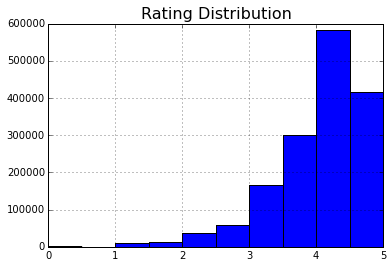

In [9]:
# histogram of rating distributions
df.review_overall.hist(bins=10)
plt.title('Rating Distribution', size=16)
plt.show()

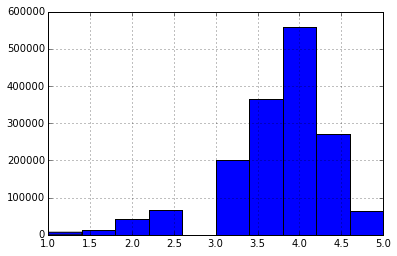

In [10]:
# histogram of aroma ratings
df.review_aroma.hist(bins=10)
plt.show()

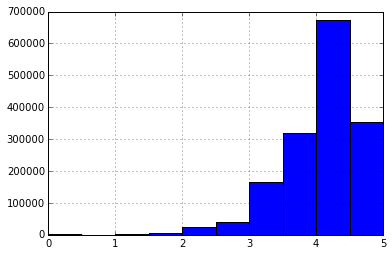

In [11]:
# histogram of appearance ratings
df.review_appearance.hist(bins=10)
plt.show()

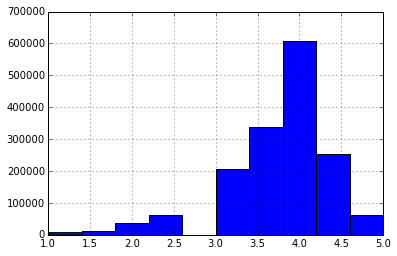

In [12]:
df.review_palate.hist(bins=10)
plt.show()

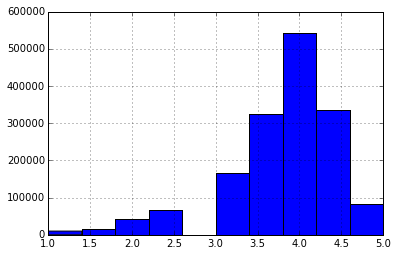

In [13]:
df.review_taste.hist(bins=10)
plt.show()

In [14]:
# count number of reviews by each user
user_count = df['review_profilename'].groupby(df['review_profilename']).count()

In [15]:
# find top ten reviewer
user_count.order(ascending=False).head(10)

review_profilename
northyorksammy    5817
BuckeyeNation     4661
mikesgroove       4617
Thorpe429         3518
womencantsail     3497
NeroFiddled       3488
ChainGangGuy      3471
brentk56          3357
Phyl21ca          3179
WesWes            3168
Name: review_profilename, dtype: int64

In [16]:
df_count = pd.DataFrame(user_count)

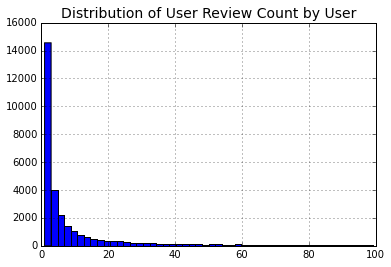

Total users:                   33387
Users with one review:         10443
Users with 1-5 reviews:        19821
Users with 5 or more reviews:  14811


In [18]:
# distribution of reviews by user
plt.figure(figsize=(10,10))
df_count[(df_count.iloc[:,0] < 100)].hist(bins = 50)
plt.title('Distribution of User Review Count by User', fontsize=14 )
plt.show()
print 'Total users:                  ', len(df_count)
print 'Users with one review:        ', len(df_count[(df_count.iloc[:,0] == 1)])
print 'Users with 1-5 reviews:       ', len(df_count[(df_count.iloc[:,0] <= 5)])
print 'Users with 5 or more reviews: ', len(df_count[(df_count.iloc[:,0] >= 5)])

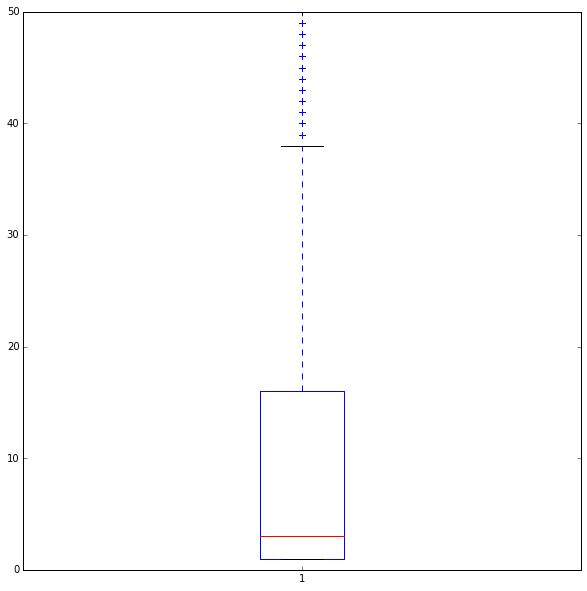

users with > 40 reviews: 5281


In [19]:
plt.figure(figsize=(10, 10))
plt.boxplot(df_count.iloc[:,0])
plt.ylim(0,50)
plt.show()
print 'users with > 40 reviews:', len(df_count[(df_count.iloc[:,0] > 40)])

### Regression Analysis of sub reviews against overall review

In [174]:
from sklearn.linear_model import LinearRegression

In [175]:
mod = LinearRegression()

In [176]:
userxreviews = df[['review_profilename','review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste']]

In [178]:
X = df[['review_aroma', 'review_appearance', 'review_palate', 'review_taste']].astype(float)
y = df[['review_overall']].astype(float)

In [179]:
mod.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [180]:
mod.coef_

array([[ 0.04780922,  0.03589102,  0.25847415,  0.55152957]])

In [195]:
# Regression Model with Stats Models
import statsmodels.api as sm

In [182]:
X = sm.add_constant(X)

In [184]:
mod = sm.OLS(y,X)

In [185]:
results = mod.fit()

In [186]:
print results.summary()

                            OLS Regression Results                            
Dep. Variable:         review_overall   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                 7.636e+05
Date:                Tue, 26 Apr 2016   Prob (F-statistic):               0.00
Time:                        21:56:55   Log-Likelihood:            -8.7999e+05
No. Observations:             1586614   AIC:                         1.760e+06
Df Residuals:                 1586609   BIC:                         1.760e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const                 0.4396      0.00

-> It appears that taste is the strongest driver of positive user reviews, while aroma and appearence have little effect.

## GRAPHLAB MODELS

In [192]:
import graphlab as gl

### Clean Data for Models

In [197]:
df.info()
print'___________________________'
print 'It looks like some beers are missing alcohol by volume data'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586266 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_abv              1518829 non-null float64
beer_beerid           1586614 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 169.5+ MB
___________________________
It looks like some beers are missing alcohol by volume data


In [198]:
# Some beers are missing data on Alcohol by Volume
print 'NAs in AVB:', len(df[df.beer_abv.isnull() == True])

NAs in AVB: 67785


In [202]:
# fill missing ABV data with the mean ABV
print 'Mean ABV: ', df.beer_abv.mean()
print '...craft beers are getting pretty strong.'
df['beer_abv'] = df.beer_abv.fillna(df.beer_abv.mean())

Mean ABV:  7.04238675321
...craft beers are getting pretty strong.


In [203]:
# convert catagorical variables to string type
df['review_profilename'] = df['review_profilename'].map(lambda x: str(x))
df['beer_name'] = df['beer_name'].map(lambda x: str(x))
df['brewery_name'] = df['brewery_name'].map(lambda x: str(x))

### Convert  to SFrame and split into training and test data sets

In [58]:
SFdata = gl.SFrame(df[['brewery_name',
                       'review_profilename',
                       'beer_abv',
                       'beer_style',
                       'beer_beerid',
                       'review_overall',
                       'review_aroma',
                       'review_appearance',
                       'review_palate',
                       'review_taste',
                       'beer_name']])

In [59]:
train, test = SFdata.random_split(.8, seed=1)

### Baseline: simple popularity model
-> This model simply calulates the mean rating for each beer and recommends the highest rated beer

In [212]:
pop_model = gl.popularity_recommender.create(train, 'review_profilename', 'beer_beerid', 'review_overall')

Recsys training: model = popularity

Warning: Ignoring columns brewery_name, beer_abv, beer_style, review_aroma, review_appearance, review_palate, review_taste, beer_name;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 1269155 observations with 31120 users and 60863 items.

Data prepared in: 2.06776s

1269155 observations to process; with 60863 unique items.

In [205]:
# Calulating Baseline RMSE

baseline_rmse = gl.evaluation.rmse(test['review_overall'], m.predict(test))
print 'Baseline RMSE: ',baseline_rmse

Baseline RMSE:  0.629287362438


### Matrix Factorization Model with Side Features and Sub-reviews

In [208]:
obs_data_train = train['review_profilename',
                       'beer_beerid',
                       'review_overall',
                       'review_aroma',
                       'review_appearance',
                       'review_palate',
                       'review_taste']
obs_data_test = test['review_profilename',
                     'beer_beerid',
                     'review_overall',
                     'review_aroma',
                     'review_appearance',
                     'review_palate',
                     'review_taste']

In [209]:
product_data_train = train['beer_beerid', 'beer_abv','brewery_name']
product_data_test = test['beer_beerid', 'beer_abv', 'brewery_name']

In [110]:
regularization_vals = [1, .1, .01, .001]

models = [gl.factorization_recommender.create(obs_data_train,
                                user_id="review_profilename",
                                item_id="beer_beerid",
                                target="review_overall",
                                item_data=product_data_train,
                                max_iterations=50,
                                num_factors=5,
                                regularization=r)
                                              for r in regularization_vals]

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1269155 observations with 31120 users and 60863 items.

Data prepared in: 3.61065s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 5        |

| regularization                 | L2 Regularization on Factors                     | 1        |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-10    |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 158644 / 1269155 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 5.80548e-05       | 0.424059                                 |

| 1       | 2.90274e-05       | 0.468393                                 |

| 2       | 1.45137e-05       | 0.492857                                 |

| 3       | 7.25685e-06       | 0.505927                                 |

+---------+-------------------+------------------------------------------+

| Final   | 5.80548e-05       | 0.424059                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 147us        | 0.522025          | 0.721245              |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.66s        | 0.439643          | 0.663049              | 5.80548e-05 |

| 2       | 3.46s        | 0.385545          | 0.620922              | 5.80548e-05 |

| 3       | 4.70s        | 0.355912          | 0.596584              | 5.80548e-05 |

| 4       | 5.91s        | 0.334218          | 0.578116              | 5.80548e-05 |

| 5       | 7.42s        | 0.317015          | 0.563041              | 5.80548e-05 |

| 6       | 9.20s        | 0.302855          | 0.550322              | 5.80548e-05 |

| 7       | 10.68s       | 0.290862          | 0.539317              | 5.80548e-05 |

| 8       | 12.25s       | 0.280575          | 0.529694              | 5.80548e-05 |

| 9       | 13.89s       | 0.27167           | 0.52122               | 5.80548e-05 |

| 10      | 15.39s       | 0.263823          | 0.513637              | 5.80548e-05 |

| 11      | 16.69s       | 0.25691           | 0.506863              | 5.80548e-05 |

| 12      | 17.96s       | 0.250762          | 0.500761              | 5.80548e-05 |

| 13      | 19.29s       | 0.245223          | 0.4952                | 5.80548e-05 |

| 14      | 20.61s       | 0.240205          | 0.490107              | 5.80548e-05 |

| 15      | 21.87s       | 0.235677          | 0.485466              | 5.80548e-05 |

| 16      | 23.11s       | 0.231578          | 0.481226              | 5.80548e-05 |

| 17      | 24.39s       | 0.227863          | 0.47735               | 5.80548e-05 |

| 18      | 25.61s       | 0.224469          | 0.473782              | 5.80548e-05 |

| 19      | 26.86s       | 0.221357          | 0.470485              | 5.80548e-05 |

| 20      | 28.19s       | 0.218497          | 0.467437              | 5.80548e-05 |

| 21      | 29.49s       | 0.215866          | 0.464614              | 5.80548e-05 |

| 22      | 30.72s       | 0.213435          | 0.46199               | 5.80548e-05 |

| 23      | 31.96s       | 0.211189          | 0.459553              | 5.80548e-05 |

| 24      | 33.23s       | 0.209108          | 0.457284              | 5.80548e-05 |

| 25      | 34.68s       | 0.207171          | 0.455161              | 5.80548e-05 |

| 26      | 36.08s       | 0.205363          | 0.45317               | 5.80548e-05 |

| 27      | 37.38s       | 0.203673          | 0.451302              | 5.80548e-05 |

| 28      | 38.71s       | 0.202103          | 0.449559              | 5.80548e-05 |

| 29      | 40.38s       | 0.200695          | 0.447989              | 5.80548e-05 |

| 30      | 42.21s       | 0.1994            | 0.446543              | 5.80548e-05 |

| 31      | 43.99s       | 0.198185          | 0.44518               | 5.80548e-05 |

| 32      | 45.40s       | 0.197046          | 0.443898              | 5.80548e-05 |

| 33      | 46.75s       | 0.195975          | 0.442691              | 5.80548e-05 |

| 34      | 47.96s       | 0.194967          | 0.441551              | 5.80548e-05 |

| 35      | 49.19s       | 0.194016          | 0.440473              | 5.80548e-05 |

| 36      | 50.50s       | 0.19312           | 0.439454              | 5.80548e-05 |

| 37      | 52.13s       | 0.192271          | 0.438487              | 5.80548e-05 |

| 38      | 53.59s       | 0.191466          | 0.437568              | 5.80548e-05 |

| 39      | 54.79s       | 0.190706          | 0.436699              | 5.80548e-05 |

| 40      | 56.34s       | 0.189989          | 0.435877              | 5.80548e-05 |

| 41      | 57.56s       | 0.189309          | 0.435097              | 5.80548e-05 |

| 42      | 58.76s       | 0.188659          | 0.434349              | 5.80548e-05 |

| 43      | 1m 0s        | 0.188037          | 0.433632              | 5.80548e-05 |

| 44      | 1m 1s        | 0.187445          | 0.432949              | 5.80548e-05 |

| 45      | 1m 3s        | 0.186878          | 0.432294              | 5.80548e-05 |

| 46      | 1m 4s        | 0.186333          | 0.431663              | 5.80548e-05 |

| 47      | 1m 5s        | 0.185813          | 0.431061              | 5.80548e-05 |

| 48      | 1m 7s        | 0.185315          | 0.430483              | 5.80548e-05 |

| 49      | 1m 8s        | 0.184837          | 0.429927              | 5.80548e-05 |

| 50      | 1m 11s       | 0.184376          | 0.429391              | 5.80548e-05 |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.184154

Final training RMSE: 0.429132

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1269155 observations with 31120 users and 60863 items.

Data prepared in: 3.72536s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 5        |

| regularization                 | L2 Regularization on Factors                     | 0.1      |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-10    |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 158644 / 1269155 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 0.000580548       | 0.191508                                 |

| 1       | 0.000290274       | 0.241873                                 |

| 2       | 0.000145137       | 0.327156                                 |

| 3       | 7.25685e-05       | 0.406579                                 |

+---------+-------------------+------------------------------------------+

| Final   | 0.000580548       | 0.191508                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 99us         | 0.520375          | 0.721243              |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.57s        | 0.215974          | 0.464656              | 0.000580548 |

| 2       | 3.33s        | 0.179968          | 0.424227              | 0.000580548 |

| 3       | 4.57s        | 0.174907          | 0.418219              | 0.000580548 |

| 4       | 5.87s        | 0.17237           | 0.415175              | 0.000580548 |

| 5       | 7.15s        | 0.170756          | 0.413226              | 0.000580548 |

| 6       | 8.91s        | 0.169608          | 0.411834              | 0.000580548 |

| 7       | 10.15s       | 0.16874           | 0.410779              | 0.000580548 |

| 8       | 11.55s       | 0.168056          | 0.409946              | 0.000580548 |

| 9       | 12.77s       | 0.167499          | 0.409266              | 0.000580548 |

| 10      | 14.00s       | 0.167034          | 0.408698              | 0.000580548 |

| 11      | 15.25s       | 0.166638          | 0.408214              | 0.000580548 |

| 12      | 16.46s       | 0.166294          | 0.407792              | 0.000580548 |

| 13      | 17.80s       | 0.165991          | 0.40742               | 0.000580548 |

| 14      | 19.02s       | 0.165724          | 0.407092              | 0.000580548 |

| 15      | 20.26s       | 0.165482          | 0.406795              | 0.000580548 |

| 16      | 21.44s       | 0.165263          | 0.406525              | 0.000580548 |

| 17      | 22.63s       | 0.165062          | 0.406278              | 0.000580548 |

| 18      | 23.88s       | 0.164876          | 0.406049              | 0.000580548 |

| 19      | 25.28s       | 0.164699          | 0.405832              | 0.000580548 |

| 20      | 26.56s       | 0.16454           | 0.405635              | 0.000580548 |

| 21      | 27.81s       | 0.164389          | 0.40545               | 0.000580548 |

| 22      | 29.06s       | 0.164245          | 0.405271              | 0.000580548 |

| 23      | 30.34s       | 0.164107          | 0.405102              | 0.000580548 |

| 24      | 31.60s       | 0.163978          | 0.404942              | 0.000580548 |

| 25      | 33.04s       | 0.163851          | 0.404785              | 0.000580548 |

| 26      | 35.09s       | 0.163734          | 0.40464               | 0.000580548 |

| 27      | 36.63s       | 0.163618          | 0.404498              | 0.000580548 |

| 28      | 38.12s       | 0.163506          | 0.404359              | 0.000580548 |

| 29      | 39.71s       | 0.163401          | 0.404229              | 0.000580548 |

| 30      | 41.32s       | 0.163298          | 0.404102              | 0.000580548 |

| 31      | 43.08s       | 0.163196          | 0.403976              | 0.000580548 |

| 32      | 44.82s       | 0.163102          | 0.403858              | 0.000580548 |

| 33      | 46.46s       | 0.163005          | 0.403738              | 0.000580548 |

| 34      | 48.10s       | 0.162914          | 0.403626              | 0.000580548 |

| 35      | 49.73s       | 0.162827          | 0.403519              | 0.000580548 |

| 36      | 51.35s       | 0.16274           | 0.403411              | 0.000580548 |

| 37      | 53.12s       | 0.162656          | 0.403306              | 0.000580548 |

| 38      | 54.86s       | 0.162573          | 0.403204              | 0.000580548 |

| 39      | 56.62s       | 0.162494          | 0.403105              | 0.000580548 |

| 40      | 58.42s       | 0.162414          | 0.403006              | 0.000580548 |

| 41      | 59.78s       | 0.162339          | 0.402913              | 0.000580548 |

| 42      | 1m 1s        | 0.162264          | 0.40282               | 0.000580548 |

| 43      | 1m 2s        | 0.16219           | 0.402729              | 0.000580548 |

| 44      | 1m 4s        | 0.162118          | 0.402639              | 0.000580548 |

| 45      | 1m 6s        | 0.162049          | 0.402554              | 0.000580548 |

| 46      | 1m 7s        | 0.161979          | 0.402466              | 0.000580548 |

| 47      | 1m 9s        | 0.161914          | 0.402385              | 0.000580548 |

| 48      | 1m 10s       | 0.161847          | 0.402302              | 0.000580548 |

| 49      | 1m 12s       | 0.16178           | 0.402219              | 0.000580548 |

| 50      | 1m 14s       | 0.161718          | 0.402142              | 0.000580548 |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.161683

Final training RMSE: 0.402099

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1269155 observations with 31120 users and 60863 items.

Data prepared in: 4.04448s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 5        |

| regularization                 | L2 Regularization on Factors                     | 0.01     |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-10    |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 158644 / 1269155 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 0.00580548        | 0.157865                                 |

| 1       | 0.00290274        | 0.164989                                 |

| 2       | 0.00145137        | 0.173228                                 |

| 3       | 0.000725685       | 0.187608                                 |

+---------+-------------------+------------------------------------------+

| Final   | 0.00580548        | 0.157865                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 178us        | 0.520208          | 0.721242              |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.56s        | 0.166372          | 0.407114              | 0.00580548  |

| 2       | 4.11s        | 0.160098          | 0.400122              | 0.00580548  |

| 3       | 5.71s        | 0.158488          | 0.398105              | 0.00580548  |

| 4       | 7.02s        | 0.157481          | 0.396839              | 0.00580548  |

| 5       | 8.30s        | 0.156799          | 0.395978              | 0.00580548  |

| 6       | 9.50s        | 0.156272          | 0.395312              | 0.00580548  |

| 7       | 10.71s       | 0.15582           | 0.394741              | 0.00580548  |

| 8       | 11.90s       | 0.155491          | 0.394323              | 0.00580548  |

| 9       | 13.31s       | 0.155187          | 0.393938              | 0.00580548  |

| 10      | 14.75s       | 0.154929          | 0.393611              | 0.00580548  |

| 11      | 16.05s       | 0.154716          | 0.39334               | 0.00580548  |

| 12      | 17.30s       | 0.154502          | 0.393067              | 0.00580548  |

| 13      | 18.59s       | 0.154338          | 0.392858              | 0.00580548  |

| 14      | 19.84s       | 0.15419           | 0.39267               | 0.00580548  |

| 15      | 21.09s       | 0.154047          | 0.392488              | 0.00580548  |

| 16      | 22.30s       | 0.153904          | 0.392307              | 0.00580548  |

| 17      | 23.65s       | 0.153784          | 0.392153              | 0.00580548  |

| 18      | 24.96s       | 0.15369           | 0.392033              | 0.00580548  |

| 19      | 26.28s       | 0.153544          | 0.391847              | 0.00580548  |

| 20      | 27.65s       | 0.153473          | 0.391756              | 0.00580548  |

| 21      | 29.04s       | 0.15342           | 0.391689              | 0.00580548  |

| 22      | 30.24s       | 0.153318          | 0.391558              | 0.00580548  |

| 23      | 31.62s       | 0.153249          | 0.391471              | 0.00580548  |

| 24      | 32.89s       | 0.153163          | 0.391361              | 0.00580548  |

| 25      | 34.29s       | 0.153093          | 0.391272              | 0.00580548  |

| 26      | 35.70s       | 0.153016          | 0.391172              | 0.00580548  |

| 27      | 36.94s       | 0.152955          | 0.391094              | 0.00580548  |

| 28      | 38.52s       | 0.152898          | 0.391021              | 0.00580548  |

| 29      | 40.15s       | 0.152855          | 0.390967              | 0.00580548  |

| 30      | 41.49s       | 0.152803          | 0.390901              | 0.00580548  |

| 31      | 42.76s       | 0.152692          | 0.390758              | 0.00580548  |

| 32      | 44.00s       | 0.1527            | 0.390769              | 0.00580548  |

| 33      | 45.25s       | 0.152582          | 0.390617              | 0.00580548  |

| 34      | 46.53s       | 0.152587          | 0.390624              | 0.00580548  |

| 35      | 47.79s       | 0.152545          | 0.39057               | 0.00580548  |

| 36      | 49.04s       | 0.152498          | 0.39051               | 0.00580548  |

| 37      | 50.35s       | 0.152467          | 0.39047               | 0.00580548  |

| 38      | 51.58s       | 0.152429          | 0.390422              | 0.00580548  |

| 39      | 52.76s       | 0.152389          | 0.390371              | 0.00580548  |

| 40      | 53.96s       | 0.152331          | 0.390296              | 0.00580548  |

| 41      | 55.17s       | 0.152315          | 0.390276              | 0.00580548  |

| 42      | 56.39s       | 0.152278          | 0.390228              | 0.00580548  |

| 43      | 57.58s       | 0.152245          | 0.390185              | 0.00580548  |

| 44      | 58.79s       | 0.15221           | 0.390141              | 0.00580548  |

| 45      | 1m 0s        | 0.152178          | 0.3901                | 0.00580548  |

| 46      | 1m 1s        | 0.15212           | 0.390026              | 0.00580548  |

| 47      | 1m 2s        | 0.152111          | 0.390014              | 0.00580548  |

| 48      | 1m 3s        | 0.152081          | 0.389975              | 0.00580548  |

| 49      | 1m 5s        | 0.152047          | 0.389932              | 0.00580548  |

| 50      | 1m 6s        | 0.152001          | 0.389873              | 0.00580548  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.151982

Final training RMSE: 0.389849

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1269155 observations with 31120 users and 60863 items.

Data prepared in: 3.56028s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 5        |

| regularization                 | L2 Regularization on Factors                     | 0.001    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-10    |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 158644 / 1269155 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 0.0580548         | Not Viable                               |

| 1       | 0.0145137         | Not Viable                               |

| 2       | 0.00362843        | Not Viable                               |

| 3       | 0.000907107       | Not Viable                               |

| 4       | 0.000226777       | No Decrease (0.881673 >= 0.519142)       |

| 5       | 5.66942e-05       | 0.462647                                 |

| 6       | 2.83471e-05       | 0.47846                                  |

| 7       | 1.41735e-05       | 0.49627                                  |

| 8       | 7.08677e-06       | 0.506666                                 |

+---------+-------------------+------------------------------------------+

| Final   | 5.66942e-05       | 0.462647                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 1.976ms      | 0.520186          | 0.721238              |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.62s        | 0.470603          | 0.685907              | 5.66942e-05 |

| 2       | 3.13s        | 0.471025          | 0.686135              | 5.66942e-05 |

| 3       | 4.44s        | 0.499123          | 0.706242              | 5.66942e-05 |

| 4       | 5.71s        | 0.539563          | 0.734253              | 5.66942e-05 |

| 5       | 7.07s        | 0.58808           | 0.766524              | 5.66942e-05 |

| 6       | 8.42s        | 0.642156          | 0.800972              | 5.66942e-05 |

| 7       | 9.73s        | 0.699886          | 0.836189              | 5.66942e-05 |

| 8       | 11.01s       | 0.759958          | 0.871328              | 5.66942e-05 |

| 9       | 12.81s       | DIVERGED          | DIVERGED              | 5.66942e-05 |

| RESET   | 13.33s       | 0.520154          | 0.721216              |             |

| 1       | 14.72s       | 0.487209          | 0.697975              | 2.83471e-05 |

| 2       | 16.31s       | 0.469625          | 0.685237              | 2.83471e-05 |

| 3       | 17.66s       | 0.464411          | 0.681397              | 2.83471e-05 |

| 4       | 19.01s       | 0.463259          | 0.680527              | 2.83471e-05 |

| 5       | 20.27s       | 0.465545          | 0.68218               | 2.83471e-05 |

| 6       | 21.47s       | 0.470245          | 0.685593              | 2.83471e-05 |

| 7       | 22.72s       | 0.477541          | 0.69087               | 2.83471e-05 |

| 8       | 23.99s       | 0.486332          | 0.697182              | 2.83471e-05 |

| 9       | 25.25s       | 0.496575          | 0.704468              | 2.83471e-05 |

| 10      | 26.70s       | 0.507507          | 0.712164              | 2.83471e-05 |

| 11      | 28.08s       | 0.519075          | 0.720222              | 2.83471e-05 |

| 12      | 29.38s       | 0.53129           | 0.728634              | 2.83471e-05 |

| 13      | 30.69s       | 0.54425           | 0.737455              | 2.83471e-05 |

| 14      | 32.04s       | 0.557925          | 0.746652              | 2.83471e-05 |

| 15      | 33.37s       | 0.572367          | 0.756244              | 2.83471e-05 |

| 16      | 34.70s       | 0.587868          | 0.766408              | 2.83471e-05 |

| 17      | 36.39s       | DIVERGED          | DIVERGED              | 2.83471e-05 |

| RESET   | 36.91s       | 0.51977           | 0.72095               |             |

| 1       | 38.17s       | 0.500684          | 0.707581              | 1.41735e-05 |

| 2       | 39.57s       | 0.487369          | 0.698102              | 1.41735e-05 |

| 3       | 40.88s       | 0.480053          | 0.692836              | 1.41735e-05 |

| 4       | 42.17s       | 0.474888          | 0.689091              | 1.41735e-05 |

| 5       | 43.40s       | 0.470923          | 0.686201              | 1.41735e-05 |

| 6       | 44.81s       | 0.467784          | 0.683903              | 1.41735e-05 |

| 7       | 46.12s       | 0.465461          | 0.682195              | 1.41735e-05 |

| 8       | 47.38s       | 0.463628          | 0.680844              | 1.41735e-05 |

| 9       | 48.63s       | 0.462336          | 0.679887              | 1.41735e-05 |

| 10      | 50.07s       | 0.461307          | 0.679122              | 1.41735e-05 |

| 11      | 51.43s       | 0.460755          | 0.678708              | 1.41735e-05 |

| 12      | 52.70s       | 0.460422          | 0.678456              | 1.41735e-05 |

| 13      | 53.99s       | 0.460636          | 0.678606              | 1.41735e-05 |

| 14      | 55.22s       | 0.46115           | 0.678978              | 1.41735e-05 |

| 15      | 56.60s       | 0.461695          | 0.679372              | 1.41735e-05 |

| 16      | 57.87s       | 0.462266          | 0.679785              | 1.41735e-05 |

| 17      | 59.07s       | 0.462832          | 0.680195              | 1.41735e-05 |

| 18      | 1m 0s        | 0.463461          | 0.68065               | 1.41735e-05 |

| 19      | 1m 1s        | 0.464336          | 0.681285              | 1.41735e-05 |

| 20      | 1m 2s        | 0.465513          | 0.682142              | 1.41735e-05 |

| 21      | 1m 4s        | 0.467022          | 0.683241              | 1.41735e-05 |

| 22      | 1m 5s        | 0.468768          | 0.68451               | 1.41735e-05 |

| 23      | 1m 6s        | 0.470778          | 0.68597               | 1.41735e-05 |

| 24      | 1m 8s        | 0.472796          | 0.687433              | 1.41735e-05 |

| 25      | 1m 9s        | 0.475087          | 0.689091              | 1.41735e-05 |

| 26      | 1m 10s       | 0.477401          | 0.690761              | 1.41735e-05 |

| 27      | 1m 12s       | 0.479824          | 0.692506              | 1.41735e-05 |

| 28      | 1m 13s       | 0.482359          | 0.694328              | 1.41735e-05 |

| 29      | 1m 15s       | 0.484888          | 0.696141              | 1.41735e-05 |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached (hard limit).

Computing final objective value and training RMSE.

Final objective value: 0.485864

Final training RMSE: 0.696841

In [213]:
(rmse_train, rmse_test) = ([], [])
for m in models:
    rmse_train.append(m['training_rmse'])
    rmse_test.append(gl.evaluation.rmse(obs_data_test['review_overall'], m.predict(obs_data_test,
                                                                          new_item_data=product_data_test)))

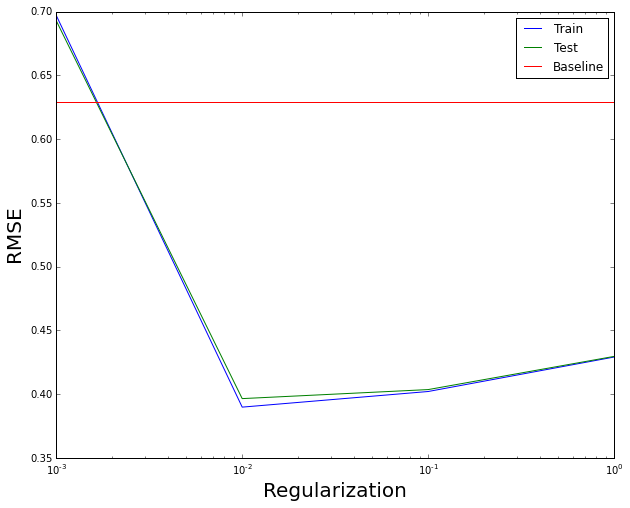

In [215]:
(fig, ax) = plt.subplots(figsize=(10, 8))
[p1, p2, p3] = ax.semilogx(regularization_vals, rmse_train, 
                           regularization_vals, rmse_test, 
                           regularization_vals, len(regularization_vals) * [baseline_rmse]
                           )
#ax.set_ylim([0.45, .7])
ax.set_xlabel('Regularization', fontsize=20)
ax.set_ylabel('RMSE', fontsize=20)
ax.legend([p1, p2, p3], ["Train", "Test", "Baseline"])
plt.show()

In [210]:
best_model = models[2]

In [217]:
rmse = gl.evaluation.rmse(obs_data_test['review_overall'], best_model.predict(obs_data_test, new_item_data=product_data_test))
print 'RMSE: ', rmse

RMSE:  0.396524745226


In [225]:
# precision and recall
prec_rec = best_model.evaluate_precision_recall(obs_data_test,
                                                new_item_data=product_data_test,
                                                cutoffs=[10],
                                                verbose=False,
                                                exclude_known=True)

In [227]:
prec_rec.keys()

['precision_recall_overall', 'precision_recall_by_user']

In [232]:
prec_rec['precision_recall_overall']

cutoff,precision,recall
10,0.00952207980904,0.0130254072255


In [237]:
prec_rec['precision_recall_by_user'].sort('precision', ascending=False)

review_profilename,cutoff,precision,recall,count
Frozensoul327,10,0.6,0.0298507462687,201
woodychandler,10,0.6,0.0145278450363,413
BuckeyeNation,10,0.6,0.00635593220339,944
mothman,10,0.5,0.0131233595801,381
Wasatch,10,0.5,0.0100401606426,498
JayS2629,10,0.5,0.0287356321839,174
tgbljb,10,0.5,0.0153374233129,326
TheManiacalOne,10,0.5,0.00950570342205,526
WVbeergeek,10,0.5,0.00954198473282,524
happygnome,10,0.5,0.049504950495,101


In [238]:
prec_rec['precision_recall_by_user'].sort('recall', ascending=False)

review_profilename,cutoff,precision,recall,count
jjamieson36,10,0.1,1.0,1
Stemm33,10,0.1,1.0,1
jimcmiller2003,10,0.1,1.0,1
About2Crash,10,0.1,1.0,1
Superfreak,10,0.1,1.0,1
jeffbrister,10,0.1,1.0,1
johnnybgood,10,0.1,1.0,1
joshmkelly,10,0.1,1.0,1
SilverJew,10,0.1,1.0,1
Shearwater,10,0.1,1.0,1
